# 2. Examples of charts. Cartesian and spherical coordinates

This notebook is part of the [Introduction to differentiable manifolds in SageMath](https://sagemanifolds.obspm.fr/intro_to_manifolds.html) by Andrzej Chrzeszczyk (Jan Kochanowski University of Kielce, Poland).

In [1]:
version()

'SageMath version 9.6, Release Date: 2022-05-15'

In every example of a manifold, some charts must be defined, so in the next four notebooks  we present examples of such definitions.

In the present  notebook we are using the `EuclideanSpace` module, since some coordinate systems are predefined in this special case. 

Generally, in the `Manifold` module, the charts (or coordinate systems) and the transition maps must be defined by the user.

<br>

### 2-dimensional case

<br>

**Example 2.1**

First consider the case of 2-dimensional Euclidean space.

In [2]:
E.<x,y> = EuclideanSpace()  # number of variables determines dimension
cartesian.<x,y> = E.cartesian_coordinates()  # Cartesian coordinates
polar.<r,ph> = E.polar_coordinates()         # polar coordinates 

Let us check, that the domains of these maps are whole Euclidean space $E^2$.

In [3]:
cartesian.domain(), polar.domain() # domains of Cart.and polar coord.

(Euclidean plane E^2, Euclidean plane E^2)

Now let us check the ranges of the coordinate  variables.

In [4]:
print(cartesian.coord_range())           # Cartesian coord. ranges
print(polar.coord_range())               # polar coord. ranges

x: (-oo, +oo); y: (-oo, +oo)
r: (0, +oo); ph: [0, 2*pi] (periodic)


The result: $r\in (0,+\infty),\ \ \phi\in [0,2\pi]$ (periodic) shows that
the predefined polar coordinates do not define a one-to one map onto an open subset of $R^2$ (the domain and the range of poolar coordinates will be restricted below).

The transition from the polar coordinate system to the Cartesian coordinate system is given by  $x=r\cos\varphi,\ \ y=r\sin\varphi$:

In [5]:
polar_to_cart = E.coord_change(polar,cartesian)  # polar -> Cartesian
polar_to_cart.display()                        # transition

x = r*cos(ph)
y = r*sin(ph)

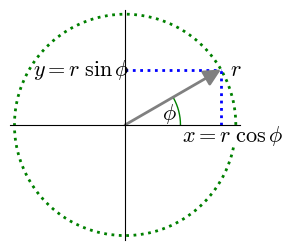

In [6]:
po1 = {'thickness': 2, 'linestyle': ':'}            # lines parameters
po2 = {'fontsize': 16, 'color': 'black'}            # text paramwters
t = var('t')                                     # symbolic variable
p0 = parametric_plot((0.5*cos(t), 0.5*sin(t)),    
                     (t,0,pi/6), color='green')                # circular arc
p1 = parametric_plot((cos(t),sin(t)),
                     (t,0,2*pi-0.2), color='green', **po1)       # dotted circle
p2 = parametric_plot((cos(pi/6),t),
                     (t,0,sin(pi/6)), color='blue', **po1)       # vertical dot-line
p3 = parametric_plot((t,sin(pi/6)),              
                     (t,0,cos(pi/6)), color='blue', **po1)       # horizontal dot-line
a = arrow((0,0), (cos(pi/6),sin(pi/6)), color='grey')      # arrow
t0 = text("$y=r\\; \\sin\\phi$", (-0.4,sin(pi/6)), **po2)     # y=rsin(phi)
t1 = text("$x=r\\;\\cos\\phi$", (cos(pi/6)+0.1,-0.1), **po2)  # x=rcos(phi)
t2 = text("$r$", (1,0.5), **po2)                            # r
t3 = text("$\\phi$", (0.4,0.1), **po2)                      # phi
(p0+p1+p2+p3+t0+t1+t2+t3+a).show(ticks=[[],[]], figsize=[3,3])

The polar coordinates defined on the entire $E^2$ are not homeomorphic.
They do not define a one-to-one
mapping of $E^2$ onto an open subset of $R^2$, since points of the form $(r, \varphi)$ and $(r, \varphi+2\pi)$ pass to the same point. 

To obtain homeomorphic charts on an open set
 and smooth invertible transitions we can restrict ourselves 
 to the  open subset of $E^2$ with half line {y=0, x>=0} excluded.

With this restriction in mind the inverse transition is well defined. 

In [7]:
cart_to_polar = E.coord_change(cartesian, polar) # transition
cart_to_polar.display()                          # Cartesian -> polar

r = sqrt(x^2 + y^2)
ph = arctan2(y, x)

https://en.wikipedia.org/wiki/Atan2

The nonvanishing of the Jacobian determinants of the one-to-one smooth mapping $f$ at all points of its domain  means that the mapping $f^{-1}$ inverse to $f$ is smooth. This follows
from the local inverse  function theorem. So let us check the Jacobians of the transition maps.

In [8]:
print(polar_to_cart.jacobian_det())   # det(Jacobian(polar->Cart))
print(cart_to_polar.jacobian_det())   # det(Jacobian(Cart->polar))

r
1/sqrt(x^2 + y^2)


This shows (again) that the point (0,0) should be excluded from the domain of transition maps. 

 As was mentioned  above, to obtain homeomorphic charts on an open set
 and smooth invertible transitions we can restrict ourselves 
 to the subset of $E^2$ with  half line $\{y=0, x\geq 0\}$ excluded.
 
 In the definition of the open set $U$, below we show how to make the corresponding restrictions.
 The round brackets in `(y!=0, x<0)` denote the inclusive OR (true if  at least one of two inputs is true).  Thus  `(y!=0, x<0)` is equivalent to $\ \ \neg(y=0\ \&\  x\geq 0)\ $ i.e., the half line $\{y=0, x\geq 0 \}$ is excluded.

In [9]:
# U is the open subset of E^2 with {y=0,x>=0} excluded
U = E.open_subset('U', coord_def={cartesian: (y!=0, x<0)})
polarU = U.chart(r'r:(0,+oo) ph:(0,2*pi):\phi')    # polar coord.
cartU = cartesian.restrict(U)        # Cartesian coordinates on U
polarU.coord_range()                 # ranges of polar on U

r: (0, +oo); ph: (0, 2*pi)

The command `coordinate_chart.plot` allows to plot coordinate lines of the chart `coordinate_chart`. 

<br>

**Example 2.2**

In our next example, coordinate_chart is polar (try polar.plot? to see more informations).
As the first  argument one can use both `polar` and `cartesian`. In polar coordinates the set 
$\ \ \varepsilon < r < r_0$, $\ \ \varepsilon < \varphi < 2\pi-\varepsilon\ \ $ is an open rectangle. 
In Cartesian coordinates its image is the circle with a small sector and some small neighborhood of (0.0) excluded.

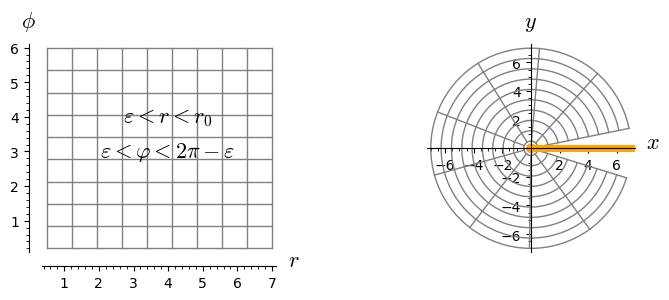

In [10]:
# To define a set with some neigborhood of the half line {y=0, x>=0} 
# excluded it is sufficient to use appropriate ranges of parameters r,ph
E.<x,y> = EuclideanSpace()  # number of variables determines dimension
cartesian.<x,y> = E.cartesian_coordinates()     # Cartesian coordinates
polar.<r,ph> = E.polar_coordinates()            # polar coordinates 
p0 = polar.plot(polar, ranges={r: (0.5,7), ph: (0.2,2*pi-0.3)},
                number_values=10, color='grey')  # plot coordinate lines r,ph
                                                 # in polar coordinates
t0 = text("$\\varepsilon < r < r_0$", (4, 4), fontsize=16, color='black')
s0 = text("$\\varepsilon < \\varphi < 2\\pi-\\varepsilon$", (4, 3), 
          fontsize=16, color='black')               # textual description
r0 = p0 + t0 + s0                                   # combine previous plots
p1 = polar.plot(cartesian, ranges={r: (0.5,7), ph: (0.2,2*pi-0.3)},
                number_values=10, color='grey')         # plot r,ph lines in Cart.coord.
p2 = point2d((0,0), size=50, color='orange')   # plot excluded neighb. of (0,0)
p3 = plot(0*x,(0,7), thickness=5, color='orange') # plot excluded halfline
p = p1 + p2 + p3                                    # combine plots
graphics_array([r0,p]).show(figsize=(8,3))          # plot graphics array

<br>
    
**Example 2.3**

The same plot with maps restricted to an open subset $U$ of $E^2$.

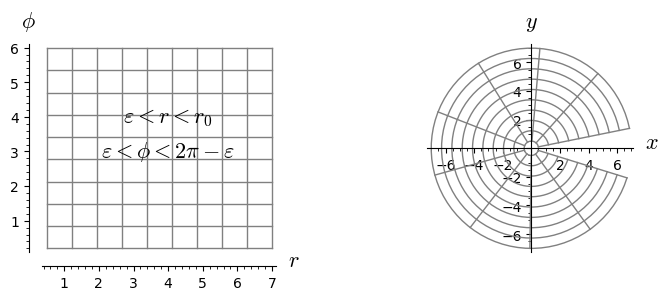

In [11]:
# continuation
U = E.open_subset('U', coord_def={cartesian: (y!=0, x<0)})
polarU = U.chart(r'r:(0,+oo) ph:(0,2*pi):\phi')   # polar coord. on U
cartU = cartesian.restrict(U)                     # Cart. coord. on U
p0 = polarU.plot(polarU, ranges={r: (0.5,7), ph: (0.2,2*pi-0.3)},
                 number_values=10, color='grey') # plot coord.lines r,ph in polar coord.
                                    # transition from polarU to cartU:
FU = U.continuous_map(U, {(polarU, cartU): [r*cos(ph), r*sin(ph)]}, name='FU')
                                   
p1 = polarU.plot(cartU, mapping=FU, ranges={r:(0.5,7), ph:(0.2,2*pi-0.3)},
                 number_values=10, color='grey') # plot the image of coord lines r,ph
t0 = text("$\\varepsilon < r < r_0$", (4, 4), fontsize=16, color='black')
s0 = text("$\\varepsilon < \\phi < 2\\pi-\\varepsilon$", 
          (4, 3), fontsize=16, color='black')         # textual description
r0 = p0 + t0 + s0                                     # combine plots
graphics_array([r0, p1]).show(figsize=(8,3))     # graphics array

Using coordinate lines one can easily plot images of any rectangle 
      $ r_0< r <r_1, \ \    \phi_0< \phi <\phi_1$:

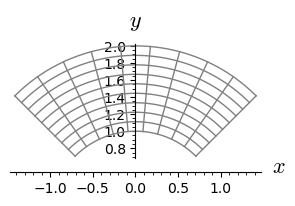

In [12]:
p = polar.plot(cartesian,ranges={r: (1,2), ph: (pi/4,3*pi/4)},
               number_values=10, color='grey')    # plot coord.lines r,ph 
p.show(figsize=3)         # in the subset r0<r<r1, ph0<ph<ph1

<br>

### 3-dimensional case

<br>

**Example 2.4**

Now consider the 3-dimensional case.

In [13]:
E.<x,y,z> = EuclideanSpace()  # number of variables determines the dimension
cartesian.<x,y,z> = E.cartesian_coordinates()  # Cartesian coordinates in E^3
spherical.<r,th,ph> = E.spherical_coordinates()  # polar coordinates in E^3

Check the domains and variables ranges.

In [14]:
cartesian.domain(), spherical.domain()  # domains of Cart. and polar coord. 

(Euclidean space E^3, Euclidean space E^3)

In [15]:
print(cartesian.coord_range())         # ranges of Cartesian coordinates  
print(spherical.coord_range())         # ranges of spherical coordinates

x: (-oo, +oo); y: (-oo, +oo); z: (-oo, +oo)
r: (0, +oo); th: (0, pi); ph: [0, 2*pi] (periodic)


As we can see, the spherical coordinates don't define a homeomorphism on the entire $E^3$
(apropriate restrictions will be given below).

The transition from
the spherical coordinate system to the Cartesian coordinate system is given by the functions 

$x = r\cos\phi\sin\theta,\quad
y = r\sin\phi\sin\theta,\quad
z = r\cos\theta$:

In [16]:
sph_to_cart = E.coord_change(spherical, cartesian) # transition 
sph_to_cart.disp()                                 # spher-> Cartesian

x = r*cos(ph)*sin(th)
y = r*sin(ph)*sin(th)
z = r*cos(th)

In [17]:
var('u v t')                                   # symb.var.

po1 = {'thickness': 5, 'color': 'darkblue'}         # param.
po2 = {'fontsize': 20, 'color': 'black'}
po3 = {'size': 7, 'color': 'black'}

ax = line3d([(0,0,0), (1+0.15,0,0)], **po1)     # axes
ax += line3d([(0,0,0), (0,1+0.15,0)], **po1)
ax += line3d([(0,0,0), (0,0,1+0.15)], **po1)
ax += text3d("x", (1.25,0,0), **po2)
ax += text3d("y", (0,1.25,0), **po2)
ax += text3d("z", (0.,0.,1.25), **po2)
                                               # hemisphere:
s = parametric_plot3d((cos(u)*cos(v), sin(u)*cos(v), sin(v)),
                      (u,0,2*pi), (v,0,pi/2), opacity=0.9, color='lightgrey')

a = 0.59                                         # triangle
tr = line3d([(0,0,0), (a,a,0), (a,a,a), (0,0,0)], **po1)

dots = point3d([(0.5*cos(t), 0.5*sin(t), 0)        # dots
                for t in srange(0,pi/4,0.1)], **po3)
dots+=point3d([(0.5*cos(t), 0.5*cos(t), 0.5*sin(t))
               for t in srange(pi/4,pi/2,0.1)], **po3)
                                               
t = text3d("(x,y,z)", (0.6,0.8,0.7),**po2)        # variables
t += text3d("φ", (0.7,0.3,0.0), **po2)
t += text3d("θ", (0.,0.2,0.5), **po2)
                                               # combine plots
(ax+s+tr+dots+t).rotateZ(-pi/8).show(frame=False)

Graphics3d Object

The spherical coordinates defined on the entire $E^3$ are not homeomorphic. They do not define a one-to-one mapping of $E^3$ onto an open subset of $R^3$, since for example, points of the form (𝑟,𝜃,𝜑) 
and (𝑟,𝜃,𝜑+2𝜋) pass to the same point. 

To obtain homeomorphic charts on an open set
 and smooth invertible transitions, we can restrict ourselves 
 to the  open subset of $E^3$ with  half plane {y=0, x>=0} excluded.

With this restriction in mind the inverse transition is well defined. 

In [18]:
cart_to_sph = E.coord_change(cartesian, spherical); # transition
cart_to_sph.display()                 # Cartesian -> spherical

r = sqrt(x^2 + y^2 + z^2)
th = arctan2(sqrt(x^2 + y^2), z)
ph = arctan2(y, x)

https://en.wikipedia.org/wiki/Atan2

Let us check the determinants of Jacobians of the transition maps.

In [19]:
sph_to_cart.jacobian_det()           # det(Jacobian(sher->cart))

r^2*sin(th)

In [20]:
cart_to_sph.jacobian_det()           # det(Jacobian(cart->spher))

1/(sqrt(x^2 + y^2 + z^2)*sqrt(x^2 + y^2))

<br>

**Example 2.5**

As we have observed, to obtain well defined transitions, we can restrict ourselves
 to the open subset of $E^3$ <br>
 with  half plane {y=0, x>=0} excluded.
 
 Below, we show how to make  apropriate restriction.
 

In [21]:
# continuation                      # define open subset U
U = E.open_subset('U', coord_def={cartesian: (y!=0, x<0)})
spherU.<r,th,ph> = U.chart(r'r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi)')
cartU = cartesian.restrict(U)         # restrict Cart. coord to U

To make a plot with some neigborhood of the half plane {y=0, x>=0} excluded
it is sufficient to use appropriate ranges of parameters.


In [22]:
# plot coord. lines using the values 0, 5.7 of r;
#                      values 0.3, 2pi-0.3 of ph;
#          and 20 values of th from [0.3,pi-0.3];

p1 = spherical.plot(cartesian,        
                    ranges={r: (0.5,7), th: (0.3,pi-0.3), ph: (0.3,2*pi-0.3)},
                    number_values={r: 2, ph: 2, th: 20},
                    color={r: 'red', ph: 'grey', th: 'red'},
                    thickness=1, label_axes=False)    # plot coord. lines r,th,ph

In [23]:
po1 = {'thickness': 3, 'color': 'darkblue'}         # param.
po2 = {'fontsize': 20, 'color': 'black'}

ax = line3d([(0,0,0), (13,0,0)], **po1)         # axes
ax += line3d([(0,0,0), (0,9,0)], **po1)
ax += line3d([(0,0,0), (0,0,8)], **po1)
ax += text3d("x", (14,0,0), **po2)
ax += text3d("y", (0,10,0), **po2)
ax += text3d("z", (0.,0.,9), **po2)
                                              # show plot:
(p1+ax).rotateZ(-pi/4).show(frame=False, label_axes=False)

Graphics3d Object


**Example 2.6**

Below we show the part of the sphere, which is excluded from the domain of the restricted spherical coordinates.

In [24]:
# continuation ; 
# plot coord. lines using the values 0, 2pi of r;
#                             values 0, pi of ph;
#                and 20 values of th from [0,pi];
p1 = spherical.plot(cartesian,
                    ranges={r: (0,2*pi), th: (0,pi), ph: (0,2*pi)},
                    number_values={r: 2, ph: 2, th: 20},
                    color={r: 'red', ph: 'grey', th: 'red'},
                    thickness={r: 2, ph: 1, th: 2}, label_axes=False)
(p1+ax).rotateZ(-pi/4).show(frame=False)

Graphics3d Object

## What's next?

Take a look at the notebook [Function graph as a manifold](https://nbviewer.org/github/sagemanifolds/IntroToManifolds/blob/main/03Manifold_Graph.ipynb).